In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [10]:
df=pd.read_csv("heart_failure.csv")

In [11]:
# shape
print(df.shape)

(299, 13)


In [12]:
# head
df.head(20)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [13]:
# descriptions
print(df.describe())

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

In [14]:
# class distribution number of instances (rows) that belong to each class
print(df.groupby('DEATH_EVENT').size())

DEATH_EVENT
0    203
1     96
dtype: int64


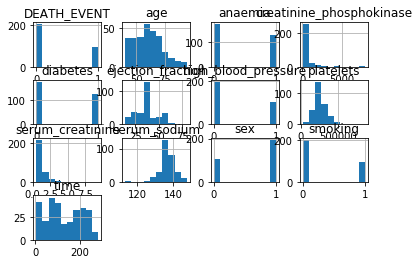

In [15]:
# histograms
df.hist()
pyplot.show()

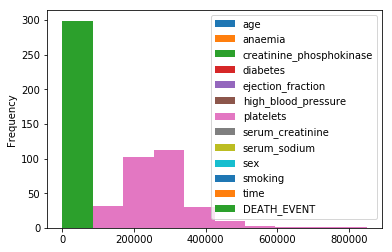

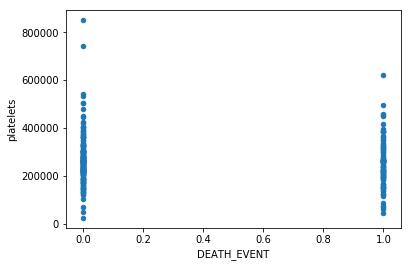

In [16]:
df.plot.hist()
df.plot.scatter(x='DEATH_EVENT',y='platelets')
plt.show()

In [17]:
x=df.drop(["DEATH_EVENT"],inplace=False,axis=1)
y=df["DEATH_EVENT"]

In [18]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [19]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)

In [20]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

1:0.55	:Cross_val_scor=[0.5656581386725993]
2:0.65	:Cross_val_scor=[0.6454949944382646]
3:0.6333333333333333	:Cross_val_scor=[0.5891138301816834]
4:0.6333333333333333	:Cross_val_scor=[0.6592955135335558]
5:0.65	:Cross_val_scor=[0.6520763811642565]
6:0.6666666666666666	:Cross_val_scor=[0.6656321839080459]
7:0.65	:Cross_val_scor=[0.6418390804597701]
8:0.65	:Cross_val_scor=[0.6557397107897663]
9:0.65	:Cross_val_scor=[0.6422840192806822]
10:0.6666666666666666	:Cross_val_scor=[0.6624137931034484]
11:0.65	:Cross_val_scor=[0.6621987393400074]
12:0.65	:Cross_val_scor=[0.6689729328883945]
13:0.65	:Cross_val_scor=[0.6725361512791992]
14:0.65	:Cross_val_scor=[0.6721987393400074]
15:0.65	:Cross_val_scor=[0.6756470152020764]
16:0.65	:Cross_val_scor=[0.6757545420837969]
17:0.65	:Cross_val_scor=[0.6656321839080459]
18:0.65	:Cross_val_scor=[0.6723062662217278]
19:0.65	:Cross_val_scor=[0.6723062662217278]
20:0.65	:Cross_val_scor=[0.6756395995550613]
21:0.65	:Cross_val_scor=[0.6756395995550613]
22:0.65	

Text(0, 0.5, 'mean error')

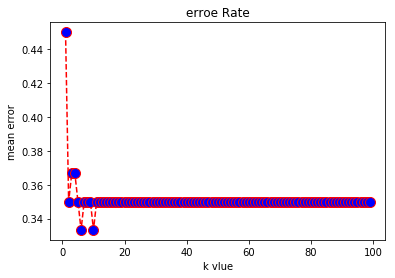

In [21]:
#choose the best parameter by using cross vaildation 
k_range=range(1,100)
error=[]
k_scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    knn_predict=knn.predict(X_test)
    error.append(np.mean(knn_predict!=y_test))
    scores=cross_val_score(knn, x,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())   
    print(str(k)+":"+str(accuracy_score(y_test, knn_predict))+"\t:Cross_val_scor=["+str(k_scores[k-1])+"]")
plt.plot(range(1,100),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('erroe Rate')
plt.xlabel('k vlue')
plt.ylabel('mean error')
    #scores=cross_val_score(knn, x,y,cv=10,scoring='accuracy')
    #k_scores.append(scores.mean())
#print(k_scores)   

In [22]:
train_scores,test_scores=list(),list()

In [23]:
#10-FOLED CROSS VAILDATION 
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    knn_predict=knn.predict(X_test)
    train_pred=knn.predict(X_train)
    test_acc=accuracy_score(y_test, knn_predict)
    train_acc=accuracy_score(y_train, train_pred)
    
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    b=np.mean(test_scores)
    v= np.mean(train_scores) 
    #scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    #knn.fit(X_train, y_train)
    #knn_predict=pred_i = knn.predict(X_test)
print("train scores :"+str(v)+"\n"+"test scores :"+str(b))

train scores :0.6926588056295171
test scores :0.6489898989898991


In [24]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
knn_predict=knn.predict(X_test)

In [25]:
knn_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [26]:
#print(test_acc)
print(confusion_matrix(y_test, knn_predict))

[[38  1]
 [19  2]]


In [27]:
print(scores.mean())

0.6790878754171302


In [28]:
y_test

73     0
102    0
160    0
148    1
24     1
187    1
281    0
239    0
37     1
270    0
273    0
245    0
122    0
280    0
153    0
85     0
167    1
238    0
98     0
61     1
82     1
16     1
121    0
185    1
108    0
178    0
172    0
39     1
34     1
179    0
63     1
253    0
20     0
48     1
224    0
182    1
149    0
269    0
191    0
166    0
8      1
81     0
10     1
25     1
97     0
256    0
202    0
145    0
135    0
31     1
18     1
279    0
15     1
244    0
226    0
175    0
100    0
232    0
217    1
298    0
Name: DEATH_EVENT, dtype: int64

In [29]:
values=[i for i in range(1,100)]

In [30]:
len(train_scores)

99

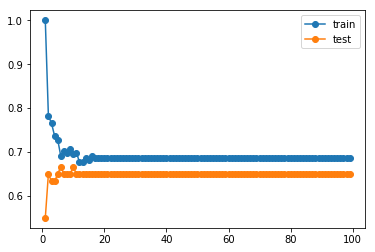

In [31]:
pyplot.plot(values,train_scores,'-o',label='train')
pyplot.plot(values,test_scores,'-o',label='test')
pyplot.legend()
pyplot.show()

In [33]:
from sklearn.externals import joblib
# Save the model as a pickle in a file
joblib.dump(knn, 'filename2.pkl')

# Load the model from the file
knn_from_joblib = joblib.load('filename2.pkl')

# Use the loaded model to make predictions
knn_from_joblib.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

train acc:1.0, test acc:0.7666666666666667


Text(0, 0.5, 'mean error')

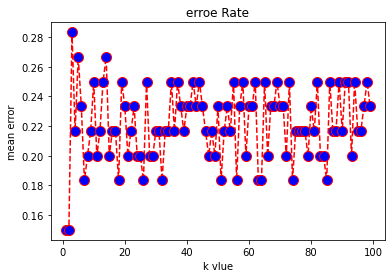

In [57]:
train_scores_dTree,test_scores_dTree=list(),list()
error=[]
for m in range(1,100):
    Dec_Tree = DecisionTreeClassifier(max_depth=m)
    Dec_Tree.fit(X_train,y_train)
    Dec_Tree_predict=Dec_Tree.predict(X_test)
    train_pred=Dec_Tree.predict(X_train)
    error.append(np.mean(Dec_Tree_predict!=y_test))
    test_acc=accuracy_score(y_test, Dec_Tree_predict)
    train_acc=accuracy_score(y_train, train_pred)
    train_scores_dTree.append(train_acc)
    test_scores_dTree.append(test_acc)
print("train acc:"+str(train_acc)+", test acc:"+str(test_acc))
plt.plot(range(1,100),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('erroe Rate')
plt.xlabel('k vlue')
plt.ylabel('mean error')

In [98]:
print(confusion_matrix(y_test, Dec_Tree_predict))

[[32  7]
 [ 7 14]]


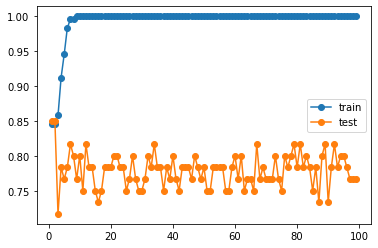

In [99]:
pyplot.plot(values,train_scores_dTree,'-o',label='train')
pyplot.plot(values,test_scores_dTree,'-o',label='test')
pyplot.legend()
pyplot.show()

In [100]:
#model = SVC(gamma='auto')
train_scores_SVC,test_scores_SVC=list(),list()

model=SVC(kernel='linear')
model.fit(X_train, y_train)
svm_predict=model.predict(X_test)
train_pred=model.predict(X_train)
test_acc=accuracy_score(y_test, svm_predict)
train_acc=accuracy_score(y_train, train_pred)
train_scores_SVC.append(train_acc)
test_scores_SVC.append(test_acc)
print("train acc:"+str(train_acc)+", test acc:"+str(test_acc))

train acc:0.8242677824267782, test acc:0.85


In [101]:
print(confusion_matrix(y_test, svm_predict))

[[37  2]
 [ 7 14]]


In [102]:
Dec_Tree_predict

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0], dtype=int64)

In [103]:
knn_predict

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [104]:
 svm_predict

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [106]:
y_test

73     0
102    0
160    0
148    1
24     1
187    1
281    0
239    0
37     1
270    0
273    0
245    0
122    0
280    0
153    0
85     0
167    1
238    0
98     0
61     1
82     1
16     1
121    0
185    1
108    0
178    0
172    0
39     1
34     1
179    0
63     1
253    0
20     0
48     1
224    0
182    1
149    0
269    0
191    0
166    0
8      1
81     0
10     1
25     1
97     0
256    0
202    0
145    0
135    0
31     1
18     1
279    0
15     1
244    0
226    0
175    0
100    0
232    0
217    1
298    0
Name: DEATH_EVENT, dtype: int64

In [107]:

# Evaluate predictions
svm_accurcy=accuracy_score(y_test,svm_predict)
knn_accurcy=accuracy_score(y_test,knn_predict)
Dec_Tree_accurcy=accuracy_score(y_test,Dec_Tree_predict)
#Linear_accurcy=accuracy_score(y_test,regressor_pred)
print("SVM accuracy="+str(svm_accurcy))
print("KNN accuracy="+str(knn_accurcy))
print("Decesion Tree accuracy="+str(Dec_Tree_accurcy))
#print("Linear Regrision accuracy="+str(Linear_accurcy))

SVM accuracy=0.85
KNN accuracy=0.65
Decesion Tree accuracy=0.7666666666666667


In [108]:
print(classification_report(y_test, svm_predict))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        39
           1       0.88      0.67      0.76        21

    accuracy                           0.85        60
   macro avg       0.86      0.81      0.82        60
weighted avg       0.85      0.85      0.84        60



In [110]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        39
           1       0.50      0.29      0.36        21

    accuracy                           0.65        60
   macro avg       0.59      0.57      0.56        60
weighted avg       0.62      0.65      0.62        60



In [111]:
print(classification_report(y_test, Dec_Tree_predict))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        39
           1       0.67      0.67      0.67        21

    accuracy                           0.77        60
   macro avg       0.74      0.74      0.74        60
weighted avg       0.77      0.77      0.77        60



In [34]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier(5)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='linear',gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    #print(name,+':'+ cv_results.mean(), cv_results.std()))

LR: 0.818804 (0.057047)
KNN: 0.599543 (0.071679)
CART: 0.828196 (0.070090)
NB: 0.802623 (0.074526)
SVM: 0.806457 (0.075371)


In [ ]:
scaler=MinMaxScaler(feature_range=(0,1)) #normalization to data
X=scaler.fit_transform(x)
scores=[]
best_svm=SVC(kernel='linear',gamma='auto')
cv=KFold(n_splits=10,random_state=42,shuffle=True)
for train_index,test_index in cv.split(X):
    #print("trian index:",train_index,"\n")
    #print("test index :",test_index)
    X_train1,X_test1,y_trian1,y_test1=X[train_index],X[test_index],y[train_index],y[test_index]
    best_svm.fit(X_train,y_train)
scores.append(best_svm.score(X_train,y_train))
best_svm.fit(X_train,y_train)
scores.append(best_svm.score(X_train,y_train))
print(np.mean(scores))

    